In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from joblib import load
from datetime import datetime
import seaborn as sns
import pickle

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, save_path="../SavedPlot"):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if save_path:
        date_str = datetime.now().strftime("%Y-%m-%d")  # Get current date
        filename = f"{date_str}_{title}.png" if title else f"{date_str}_confusion_matrix.png"
        plt.savefig(f"{save_path}/{filename}")
        print(f"Confusion matrix saved to {save_path}/{filename}")

    plt.show()

<Axes: xlabel='fall_adl_bin', ylabel='count'>

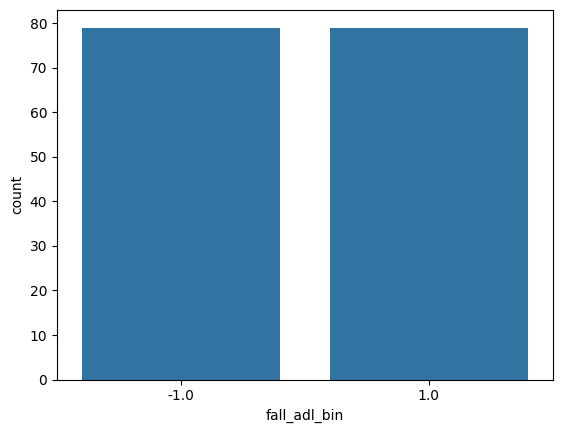

In [4]:
df = pd.read_csv("test_extracted_balanced.csv")
df.head()
sns.countplot(x="fall_adl_bin", data=df)

In [5]:
X_test = df.iloc[:, 1:-1]
y_test = df.iloc[:, -1]

2. Apply saved decision tree model

In [6]:
path = '../rf_model.pkl'
with open(path, 'rb') as file:
    model = pickle.load(file)
    print(model)

c:\Users\tungq\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=10, max_features=2,
                                        max_leaf_nodes=16, min_samples_leaf=2,
                                        min_samples_split=4,
                                        n_estimators=10))])


c:\Users\tungq\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\tungq\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\tungq\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning

In [7]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=10, max_features=2,
                                        max_leaf_nodes=16, min_samples_leaf=2,
                                        min_samples_split=4,
                                        n_estimators=10))])

In [8]:
y_test_pred = model.predict(X_test)

Confusion matrix saved to ../SavedPlot/2024-12-22_Test Set Confusion Matrix on New Validated Random Forest Model.png


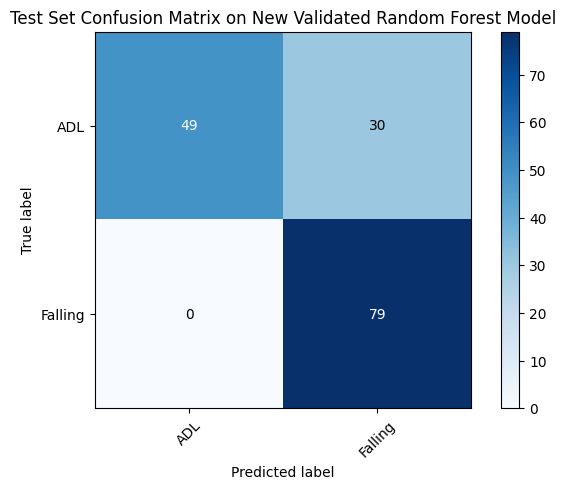

In [9]:
label_names = ['ADL', 'Falling']
title='Test Set Confusion Matrix on New Validated Random Forest Model'
plot_confusion_matrix(y_test, y_test_pred, label_names, title=title)

In [10]:
classification_report(y_test, y_test_pred, target_names=label_names, output_dict=True)

{'ADL': {'precision': 1.0,
  'recall': 0.620253164556962,
  'f1-score': 0.765625,
  'support': 79.0},
 'Falling': {'precision': 0.7247706422018348,
  'recall': 1.0,
  'f1-score': 0.8404255319148937,
  'support': 79.0},
 'accuracy': 0.810126582278481,
 'macro avg': {'precision': 0.8623853211009174,
  'recall': 0.810126582278481,
  'f1-score': 0.8030252659574468,
  'support': 158.0},
 'weighted avg': {'precision': 0.8623853211009175,
  'recall': 0.810126582278481,
  'f1-score': 0.8030252659574468,
  'support': 158.0}}